<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [ ]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    # Your code goes here
    pass

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [ ]:
def binarize(M, threshold=0.5):
    # Your code goes here
    pass

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [7]:
def unique_rows(mat):
    v_shape, h_shape = mat.shape
    result = []
    for i in range(v_shape):
        unique = []
        for j in range(h_shape):
            if mat[i,j] not in unique:
                unique.append(mat[i,j])
        result.append(unique)
    return result
    
def unique_columns(mat):
    v_shape, h_shape = mat.shape
    result = []
    for i in range(h_shape):
        unique = []
        for j in range(v_shape):
            if mat[j,i] not in unique:
                unique.append(mat[j,i])
        result.append(unique)
    return result

In [50]:
class TestUnique(unittest.TestCase):

    def test_no_unique_rows(self):
        X = np.vstack([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
        self.assertEqual(unique_rows(X), [[1, 2, 3], [4, 5, 6], [7, 8, 9]])

    def test_no_unique_columns(self):
        X = np.vstack([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
        self.assertEqual(unique_columns(X), [[1, 4, 7], [2, 5, 8], [3, 6, 9]])

    def test_unique_rows(self):
        X = np.vstack([[1, 2, 2], [4, 5, 6], [7, 9, 9]])
        self.assertEqual(unique_rows(X), [[1, 2], [4, 5, 6], [7, 9]])

    def test_unique_columns(self):
        X = np.vstack([[1, 2, 3], [1, 5, 6], [7, 8, 6]])
        self.assertEqual(unique_columns(X), [[1, 7], [2, 5, 8], [3, 6]])


unittest.main(argv=[''], verbosity=2, exit=False)

test_even_shape (__main__.TestChess.test_even_shape) ... ok
test_no_unique_columns (__main__.TestUnique.test_no_unique_columns) ... ok
test_no_unique_rows (__main__.TestUnique.test_no_unique_rows) ... ok
test_unique_columns (__main__.TestUnique.test_unique_columns) ... ok
test_unique_rows (__main__.TestUnique.test_unique_rows) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.007s

OK


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [41]:
def generate_normal_matrix(m, n):
    X = np.random.normal(size=(m, n))
    means_rows = X.mean(axis=0)
    disp_rows = X.var(axis=0)
    means_cols = X.mean(axis=1)
    disp_cols = X.var(axis=1)
    plt.hist(means_rows, alpha=0.5)
    plt.hist(disp_rows, alpha=0.5)
    plt.legend(("M по строкам", "D по строкам"))
    plt.show()
    plt.hist(means_cols, alpha=0.5)
    plt.hist(disp_cols, alpha=0.5)
    plt.legend(("M по столбцам", "D по столбцам"))
    plt.show()
    return means_rows, disp_rows, means_cols, disp_cols

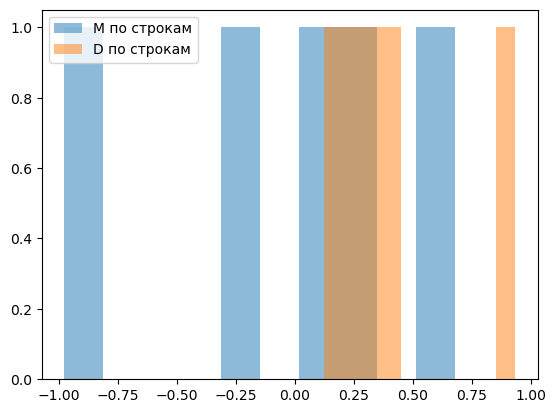

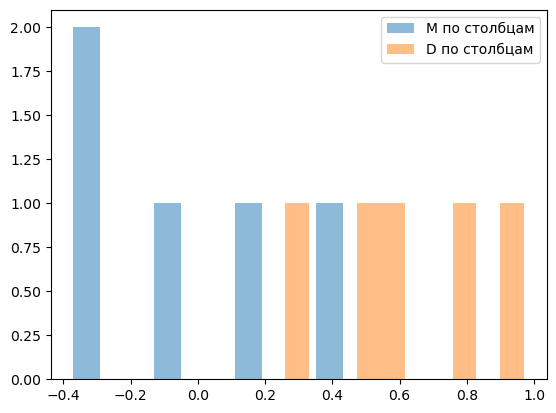

(array([ 0.67844875,  0.0920899 ,  0.24050156, -0.24471628, -0.97760082]),
 array([0.29458311, 0.42467129, 0.93308816, 0.21465333, 0.12401103]),
 array([-0.09115666,  0.13913508, -0.31921882, -0.37086932,  0.43083282]),
 array([0.55112046, 0.25982368, 0.77315855, 0.52585454, 0.97052365]))

In [42]:
generate_normal_matrix(5, 5)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [46]:
def chess(m, n, a, b):
    X = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            X[i, j] = a if (i + j) % 2 == 0 else b
    return X

In [52]:
class TestChess(unittest.TestCase):

    def test_odd_shape(self):
        X = np.vstack([[1, 2, 1], [2, 1, 2], [1, 2, 1]])
        self.assertTrue(np.array_equal(chess(3, 3, 1, 2), X))

    def test_even_shape(self):
        X = np.vstack([[1, 2, 1, 2], [2, 1, 2, 1], [1, 2, 1, 2], [2, 1, 2, 1]])
        self.assertTrue(np.array_equal(chess(4, 4, 1, 2), X))


unittest.main(argv=[''], verbosity=2, exit=False)

test_even_shape (__main__.TestChess.test_even_shape) ... ok
test_odd_shape (__main__.TestChess.test_odd_shape) ... ok
test_no_unique_columns (__main__.TestUnique.test_no_unique_columns) ... ok
test_no_unique_rows (__main__.TestUnique.test_no_unique_rows) ... ok
test_unique_columns (__main__.TestUnique.test_unique_columns) ... ok
test_unique_rows (__main__.TestUnique.test_unique_rows) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.009s

OK


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [1]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # Your code goes here
    pass

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    # Your code goes here
    pass

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [ ]:
# Your code goes here

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [ ]:
# Your code goes here